In [1]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
import numpy as np

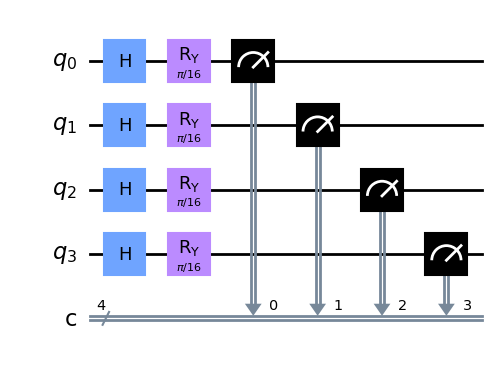

In [107]:
qc = QuantumCircuit(4, 4)

#qc.h(list(range(4)))

qc.h([0,1,2,3])

qc.ry(np.pi/16, 0)
qc.ry(np.pi/16, 1)
qc.ry(np.pi/16, 2)
qc.ry(np.pi/16, 3)


qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

#qc.h([0,1,2,3])

#qc.h(list(range(4)))


qc.draw("mpl")

In [104]:
st = Statevector(qc)
st.draw("latex")

<IPython.core.display.Latex object>

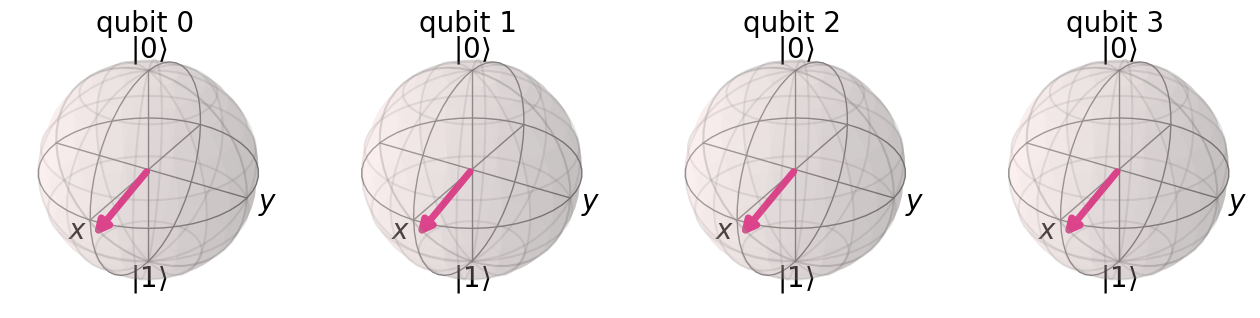

In [109]:
plot_bloch_multivector(st)

In [108]:
backend = BasicAer.get_backend('qasm_simulator')
execute(qc, backend=backend, shots=100).result().get_counts()

{'1100': 9,
 '1101': 10,
 '0100': 1,
 '1001': 4,
 '1110': 10,
 '0111': 11,
 '1011': 6,
 '0110': 8,
 '0010': 9,
 '0101': 7,
 '1111': 9,
 '1000': 3,
 '0011': 6,
 '1010': 6,
 '0000': 1}

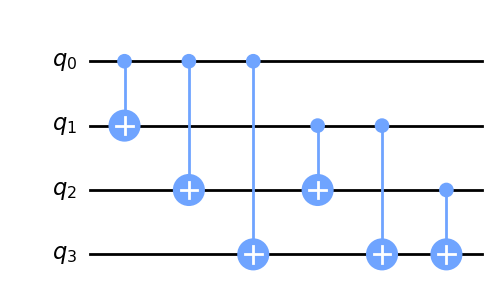

In [136]:
oracle = QuantumCircuit(4)

oracle.cx(0, 1)
oracle.cx(0, 2)
oracle.cx(0, 3)

oracle.cx(1, 2)
oracle.cx(1, 3)

oracle.cx(2, 3)


oracle.draw("mpl")

In [130]:
def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix of this circuit
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix, max_size=99999))

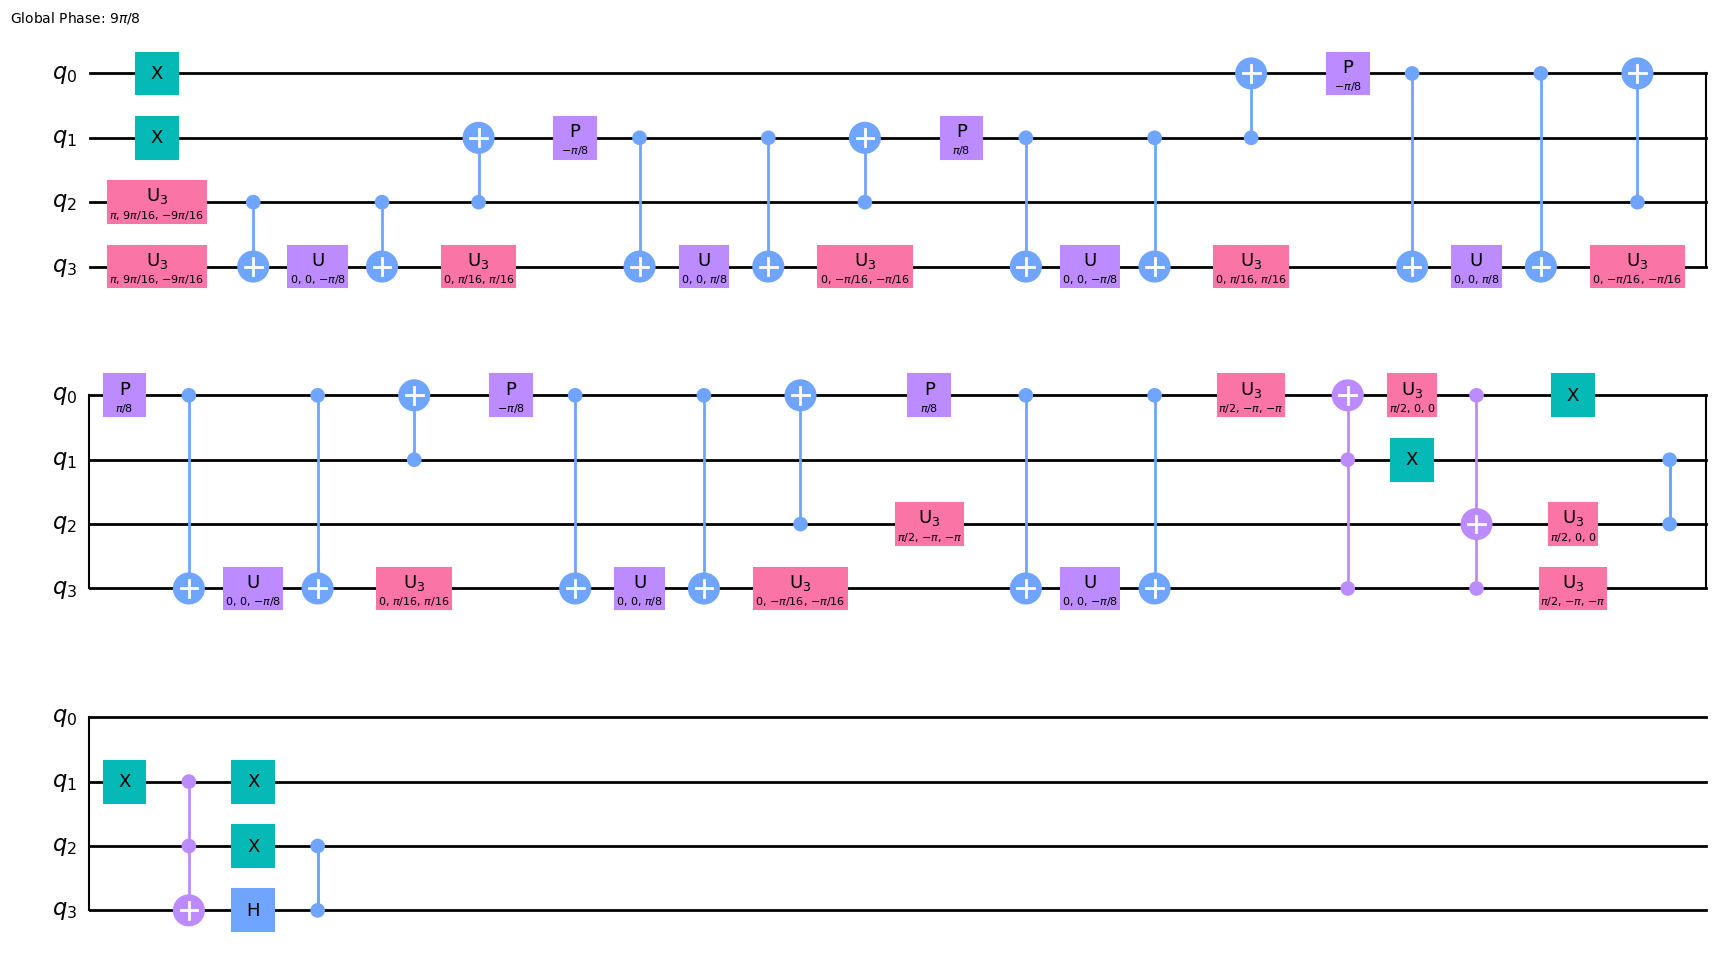

In [147]:
from qiskit.circuit.library import PhaseOracle
from qiskit import transpile
from qiskit.providers.aer import AerSimulator

sim = AerSimulator()

oracle = PhaseOracle.from_dimacs_file('oracle-minority.dimacs')
oracle = transpile(oracle, sim)
oracle.draw('mpl')

In [148]:
display_unitary(oracle)

<IPython.core.display.Latex object>